# Pendulum example

- a simple pendulum (a mass on a string) can be used to measure the gravitational acceleration g
- such a measurement was performed by students in a lab class and the results were recorded and stored in a CSV (comma separated values) file
- the measurements are a mix of "first pendulum" (large uncertainty) and "best pendulum" (smaller uncertainty) measurements

- __First step: Let's look at the raw data__

__Second step: Read in the raw data, make a histogram, plot the data and examine it__

- most of the data are close to 10m/s^2, but one data point is at 980 m/s^2
- data points like this are called outliers
- what to do with data like this?
- Do not just throw them away, but think how this might have happened
- is there an explanation? Was this a mistake or is this a big discovery?
- in this case, it is __likely__ that someone reported the result in cm/s^2 instead of m/s^2, making a factor of 100 difference
- let's do this again, but clean up the data before plotting

# of measurements read is 353
Gaussian parameters: [117.0, 23.4, 9.828187536427762, 0.2335668996246875, 0.7007006988740625]

HW 3, question 1: What is the value of g?
g = 9.809

HW 3, question 2: What is width of the 2nd Gaussian?
sigma2 = 0.619

HW 3, question 3: What is the chi^2 of the fit?
Chi^2 = 18.013 for 19 #DOF


Text(0, 0.5, '#of measurements per bin')

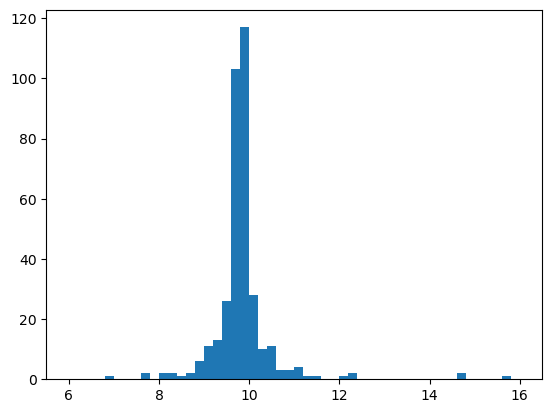

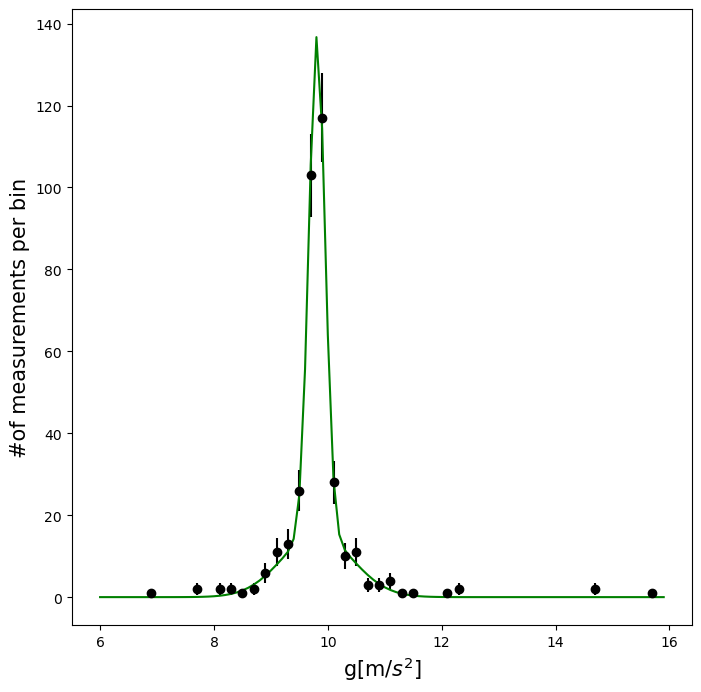

In [4]:
#### import numpy as np
import matplotlib.pylab as plt
import numpy as np
from scipy.optimize import curve_fit

# Define a Gaussian function
def gauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*(sigma**2)))

def dbl_gauss(x, a1,a2, x0, sigma1,sigma2):
    dx2 = (x-x0)**2
    y = a1*np.exp(-dx2/(2*(sigma1**2)))
    y = y + a2*np.exp(-dx2/(2*(sigma2**2)))
    return y
                
    
# open a text file containing data

f = open("../../Data/pendulumData.csv","r")

#read one line of data and discard

s = f.readline()

# define empty array to store data values
g = []


#the while loop will run until the end of file or i == nevent
flag = True
i = 0
while flag:
    s = f.readline()
    if s:
#        print(i,s)
        ss = s.split(",")
        x = float(ss[1])
        if(x > 500.0):
            x = x/100.0
        g.append(x)
        i = i + 1
    else:
        # reached end of file; stop while loop
        flag = False
        
print("# of measurements read is",i)
f.close()

# number of bins for histograms
nbins = 50

#range for histograms
xmin = 6
xmax = 16
                  
# set starting values for the Gaussian fit

counts, edges, junk = plt.hist(g, bins = nbins,range = [xmin,xmax])
g_max = np.amax(counts)
g_ave = np.average(g)
g_std = np.std(g)
par = [g_max,g_max/5,g_ave,g_std/3,g_std]

g_uncertainty = g_std/np.sqrt(i)
print("Gaussian parameters:",par)

# calculate the uncertainty on each bin as sqrt(entries)
y_err = []
x_val = []
y_val = []
for i in range(len(counts)):
    e = np.sqrt(counts[i])
    if e > 0:
        y_err.append(e)
        x_val.append((edges[i]+edges[i+1])/2)
        y_val.append(counts[i])

plt.figure(figsize=(8,8))
plt.errorbar(x_val,y_val,yerr=y_err,fmt='ko')
plt.xlabel(r'g[m/$s^2$]', fontsize = 15)
plt.ylabel(r'#of measurements per bin', fontsize = 15)

#using the starting parameters, fit a Gaussian curve to the data
popt, pcov = curve_fit(dbl_gauss, x_val, y_val,p0 = par, sigma = y_err)

# get parameter errors as sqrt of diagonal of covariance matrix
perr = np.sqrt(np.diag(pcov))

# calculate the chi^2
chi2 = 0.0
for i in range(len(x_val)):
    x = (dbl_gauss(x_val[i],*popt) - y_val[i])/y_err[i]
    chi2 = chi2 + x*x
    
ndof = len(x_val) - len(par)

print()
print("HW 3, question 1: What is the value of g?")
print(f"g = {popt[2]:.3f}")

print()
print("HW 3, question 2: What is width of the 2nd Gaussian?")
print(f"sigma2 = {popt[4]:.3f}")

print()
print("HW 3, question 3: What is the chi^2 of the fit?")
print(f"Chi^2 = {chi2:.3f} for {ndof} #DOF")
    

# plot Gaussian with fitted parameters
xx = np.arange(xmin,xmax,0.1)
plt.plot(xx, dbl_gauss(xx, *popt),'g',label="Gaussian fit")

plt.xlabel(r'g[m/$s^2$]', fontsize = 15)
plt.ylabel(r'#of measurements per bin', fontsize = 15)
